#### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

##### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

##### Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

##### Objective:

To implement the techniques learned as a part of the course.


##### Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model

In [242]:
import pandas as pd    
import bs4
from bs4 import BeautifulSoup
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import contractions                                     # Import contractions library.
import nltk as nlp
from nltk.corpus import stopwords                   #Stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [132]:
train = pd.read_csv("Tweets.csv", header=0)

## Data Summary


In [133]:
train.shape

(14640, 15)

In [134]:
train.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

In [135]:
train = train[["airline_sentiment","text","airline","retweet_count"]]

In [177]:
train['airline_sentiment'].unique()         #check the labels

array(['neutral', 'positive', 'negative'], dtype=object)

In [136]:
train.head()

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America,0


In [137]:
print (train["text"])

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


## Exploratory data analysis

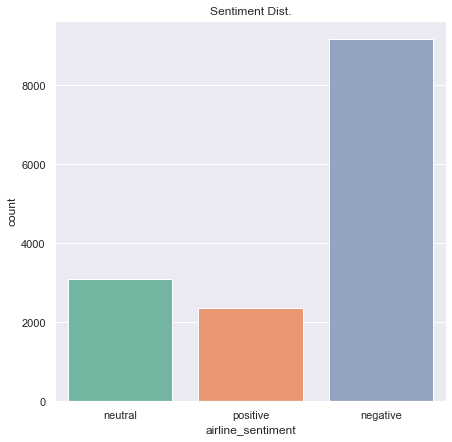

In [138]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=train["airline_sentiment"],palette="Set2")
plt.title("Sentiment Dist.")
plt.show()

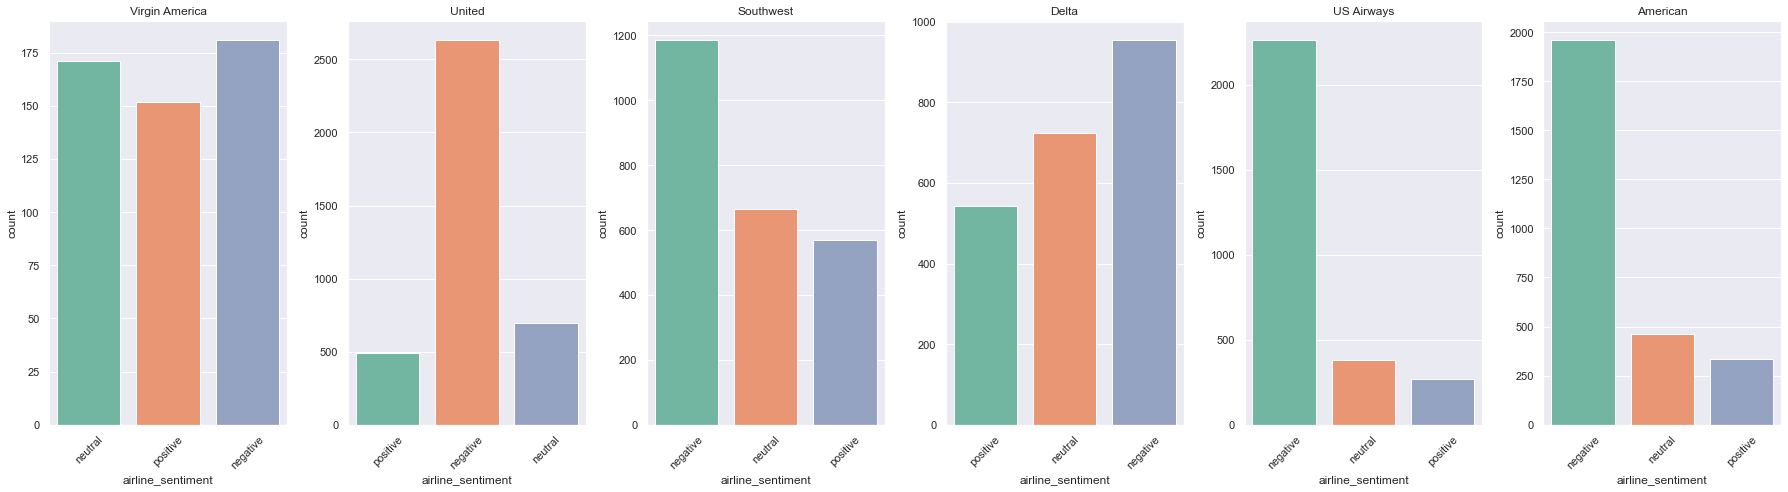

In [139]:
j=1
plt.subplots(figsize=(25,7),tight_layout=True)
for i in train["airline"].unique():
        x = train[train["airline"]==i]
        plt.subplot(1, 6, j)
        sns.countplot(x["airline_sentiment"],palette="Set2")
        plt.xticks(rotation=45)
        plt.title(i)
        j +=1
plt.show()

### **Word Cloud for Negative Reviews**

In [247]:
#creating word cloud for negative reviews
negative_text=train[train['airline_sentiment']=='negative']
words = ' '.join(negative_text['text'])
cleaned_word = " ".join([word for word in words.split()])

In [248]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

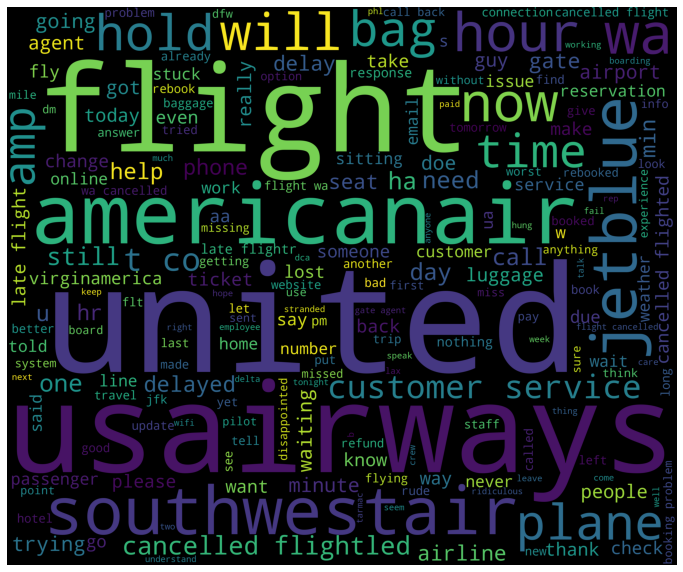

In [249]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Word Cloud for Positive Reviews**

In [251]:
#creating word cloud for positive reviews
positive_reviews=train[train['airline_sentiment']=='positive']
words = ' '.join(positive_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [252]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

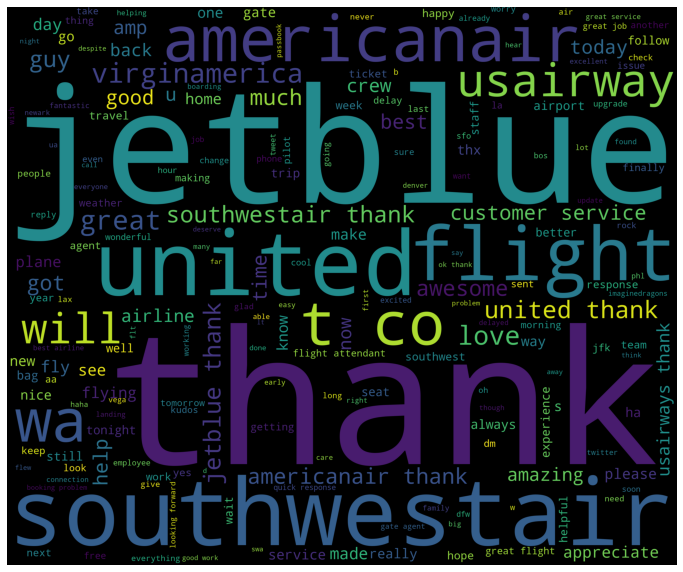

In [253]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Understanding of Data Columns

In [155]:
#Drop all other columns except “text” and “airline_sentiment”
train = train[["airline_sentiment","text"]]

In [156]:
train

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercial t...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...
...,...,...
14635,positive,americanair thank you we got on a different fl...
14636,negative,americanair leaving over minute late flight no...
14637,neutral,americanair please bring american airline to b...
14638,negative,americanair you have my money you change my fl...


In [154]:
#Check the shape of the data
train.shape

(14640, 2)

In [153]:
#Print the first 5 rows of data
train.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercial t...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...


## **Data Pre-processing:**

- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [140]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

train['text'] = train['text'].apply(lambda x: replace_contractions(x))


train['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [141]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

train['text'] = train['text'].apply(lambda x: remove_numbers(x))
train['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  ppl so we need  know how...
Name: text, Length: 14640, dtype: object

In [142]:
#remove accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

train['text']  = train['text'].apply(lambda x: remove_accented_chars(x))
train['text']                                       

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  ppl so we need  know how...
Name: text, Length: 14640, dtype: object

In [143]:
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x = str(x)
    x = re.sub("[^a-zA-z]", " ",x)
    x = x.lower()

    return x

train['text']  = train['text'].apply(lambda x: preprocess(x))
train['text']     

0                       virginamerica what  dhepburn said 
1         virginamerica plus you have added commercials...
2         virginamerica i did not today    must mean i ...
3         virginamerica it is really aggressive to blas...
4         virginamerica and it is a really big bad thin...
                               ...                        
14635     americanair thank you we got on a different f...
14636     americanair leaving over  minutes late flight...
14637     americanair please bring american airlines to...
14638     americanair you have my money  you change my ...
14639     americanair we have  ppl so we need  know how...
Name: text, Length: 14640, dtype: object

##### Remove Stopwords

In [144]:
stopwords = stopwords.words('english')
stopwords.remove('not')

In [145]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [146]:
print([train['airline_sentiment'][0]])

['neutral']


##### Lemmitize data

In [147]:
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x = str(x)
    x = nlp.word_tokenize(x)
    #x = [i for i in x if not i in set(stopwords.words("english"))] #slowly
    x = [lemma.lemmatize(i) for  i in x]
    x = " ".join(x)
    return x

train.text = train.text.apply(preprocess)
train.text[0:10]

0                     virginamerica what dhepburn said
1    virginamerica plus you have added commercial t...
2    virginamerica i did not today must mean i need...
3    virginamerica it is really aggressive to blast...
4    virginamerica and it is a really big bad thing...
5    virginamerica seriously would pay a flight for...
6    virginamerica yes nearly every time i fly vx t...
7    virginamerica really missed a prime opportunit...
8          virginamerica well i did not but now i do d
9    virginamerica it wa amazing and arrived an hou...
Name: text, dtype: object

In [90]:
# Get the number of tweets based on the dataframe column size
num_tweets = train["text"].size

# Initialize an empty list to hold the clean tweets
clean_train_tweets = []

# Loop over each twees; create an index i that goes from 0 to the length
# of the movie tweets list 
for i in range( 0, num_tweets ):
    # Call our function for each one, and add the result to the list of
    # clean tweets
    clean_train_tweets.append( tweets_to_words( train["text"][i] ) )

In [170]:
clean_train_tweets[0]

'virginamerica dhepburn said'

## Vectorization

In [160]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(max_features=1000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_tweets)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
print(train_data_features.shape)
print(type(train_data_features))


(14640, 1000)
<class 'numpy.ndarray'>


In [166]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [174]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(clean_train_tweets)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(clean_train_tweets)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(14640, 13000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Modelling , tuning and Evaluation

In [178]:
X = vector

y = train.airline_sentiment

In [181]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

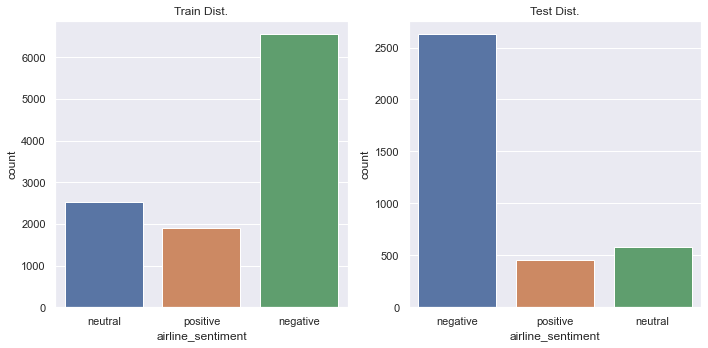

In [182]:
# Check test distribution
sns.set()
plt.subplots(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train Dist.")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test Dist.")
plt.show()

### Random Forrst Classifier

In [183]:
#Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

### Model Evaluation

In [186]:
#Result
rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred, average="micro")

print("Random Forest")
print("Accuracy : %",round(rf_acc*100,2))
print("F1 Score : %",round(rf_f1*100,2))

Random Forest
Accuracy : % 79.07
F1 Score : % 79.07


In [190]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [258]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

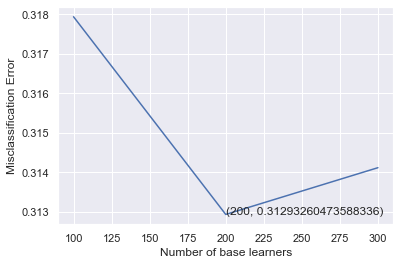

In [259]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [256]:
y_test

10980    negative
10981    negative
10982    negative
10983    negative
10984    positive
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 3660, dtype: object

In [257]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['negative' , 'positive', 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.80      0.97      0.88      2627
    positive       0.63      0.18      0.28       577
     neutral       0.77      0.51      0.61       456

    accuracy                           0.79      3660
   macro avg       0.73      0.55      0.59      3660
weighted avg       0.77      0.79      0.75      3660

Accuracy of the model is :  0.7885245901639344


### Confusion Matrix

[[2551   43   33]
 [ 438  102   37]
 [ 202   14  240]]


<AxesSubplot:>

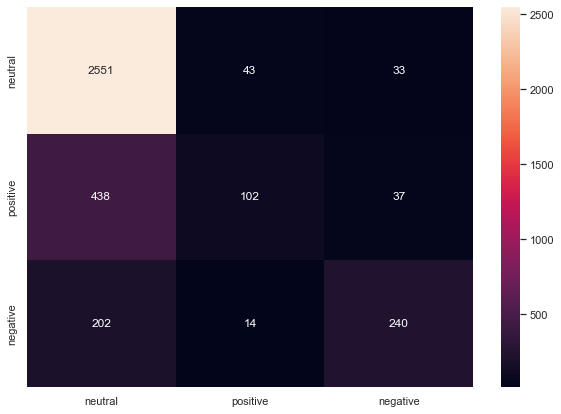

In [255]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral', 'positive', 'negative']],
                  columns = [i for i in ['neutral', 'positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
from textblob import TextBlob

In [ ]:
data_new = train.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [ ]:
data_new

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercial t...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...
...,...,...
14635,positive,americanair thank you we got on a different fl...
14636,negative,americanair leaving over minute late flight no...
14637,neutral,americanair please bring american airline to b...
14638,negative,americanair you have my money you change my fl...


In [ ]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,airline_sentiment,text,polarity
0,neutral,virginamerica what dhepburn said,0.00000
1,positive,virginamerica plus you have added commercial t...,0.00000
2,neutral,virginamerica i did not today must mean i need...,-0.31250
3,negative,virginamerica it is really aggressive to blast...,0.00625
4,negative,virginamerica and it is a really big bad thing...,-0.35000


In [ ]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,polarity,polarity_score
0,neutral,virginamerica what dhepburn said,0.00000,1
1,positive,virginamerica plus you have added commercial t...,0.00000,1
2,neutral,virginamerica i did not today must mean i need...,-0.31250,0
3,negative,virginamerica it is really aggressive to blast...,0.00625,1
4,negative,virginamerica and it is a really big bad thing...,-0.35000,0


In [ ]:
data_new["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data_new = data_new[["text","airline_sentiment","Text_Blob_pred"]]
data_new.head()

,text,airline_sentiment,Text_Blob_pred
0,virginamerica what dhepburn said,neutral,1
1,virginamerica plus you have added commercial t...,positive,1
2,virginamerica i did not today must mean i need...,neutral,0
3,virginamerica it is really aggressive to blast...,negative,1
4,virginamerica and it is a really big bad thing...,negative,0


In [ ]:
# Initialize a Random Forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 10,n_jobs=4) 
# Fit the forest to the training set, using the bag of words as 
# features and the airline_sentiment labels as the response variable
#
# This may take a few minutes to run
print ("Training the random forest...")
forest = forest.fit( vector, train["airline_sentiment"] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,train_data_features,train["airline_sentiment"],cv=10)))

Training the random forest...
RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6920081967213114


# **Conclusions**
#### The below are the takeaway points from the above case study
- Exploratory Data Analysis.
- Text preprocessing methods.
- Working on Encoding text data using Count Vectorizer and TF-IDF and  classifying them using Machine learning models.
- Working on Unsupervised learning methods for Sentiment Analysis like TextBlob sentiment analysis.